<a href="https://colab.research.google.com/github/thummapalasuresh/Internship_projects/blob/main/Concrete_strength_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv("/content/Concrete_Data_Yeh.csv")
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [21]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [22]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.shape

(1030, 9)

In [7]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
flyash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseaggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineaggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
csMPa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [9]:
df.shape

(1030, 9)

In [10]:
len(df)

1030

In [11]:
df.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


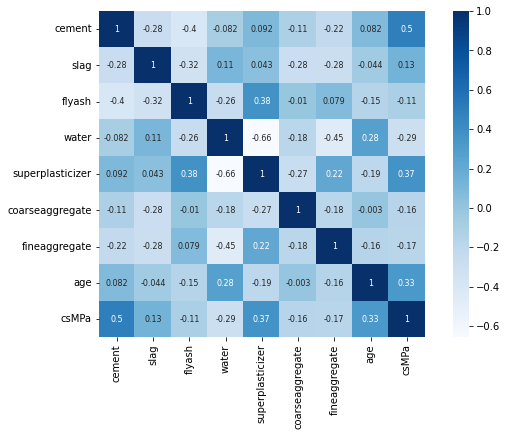

In [72]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot= True, annot_kws={"fontsize":8},cmap="Blues",square=True)
plt.show()

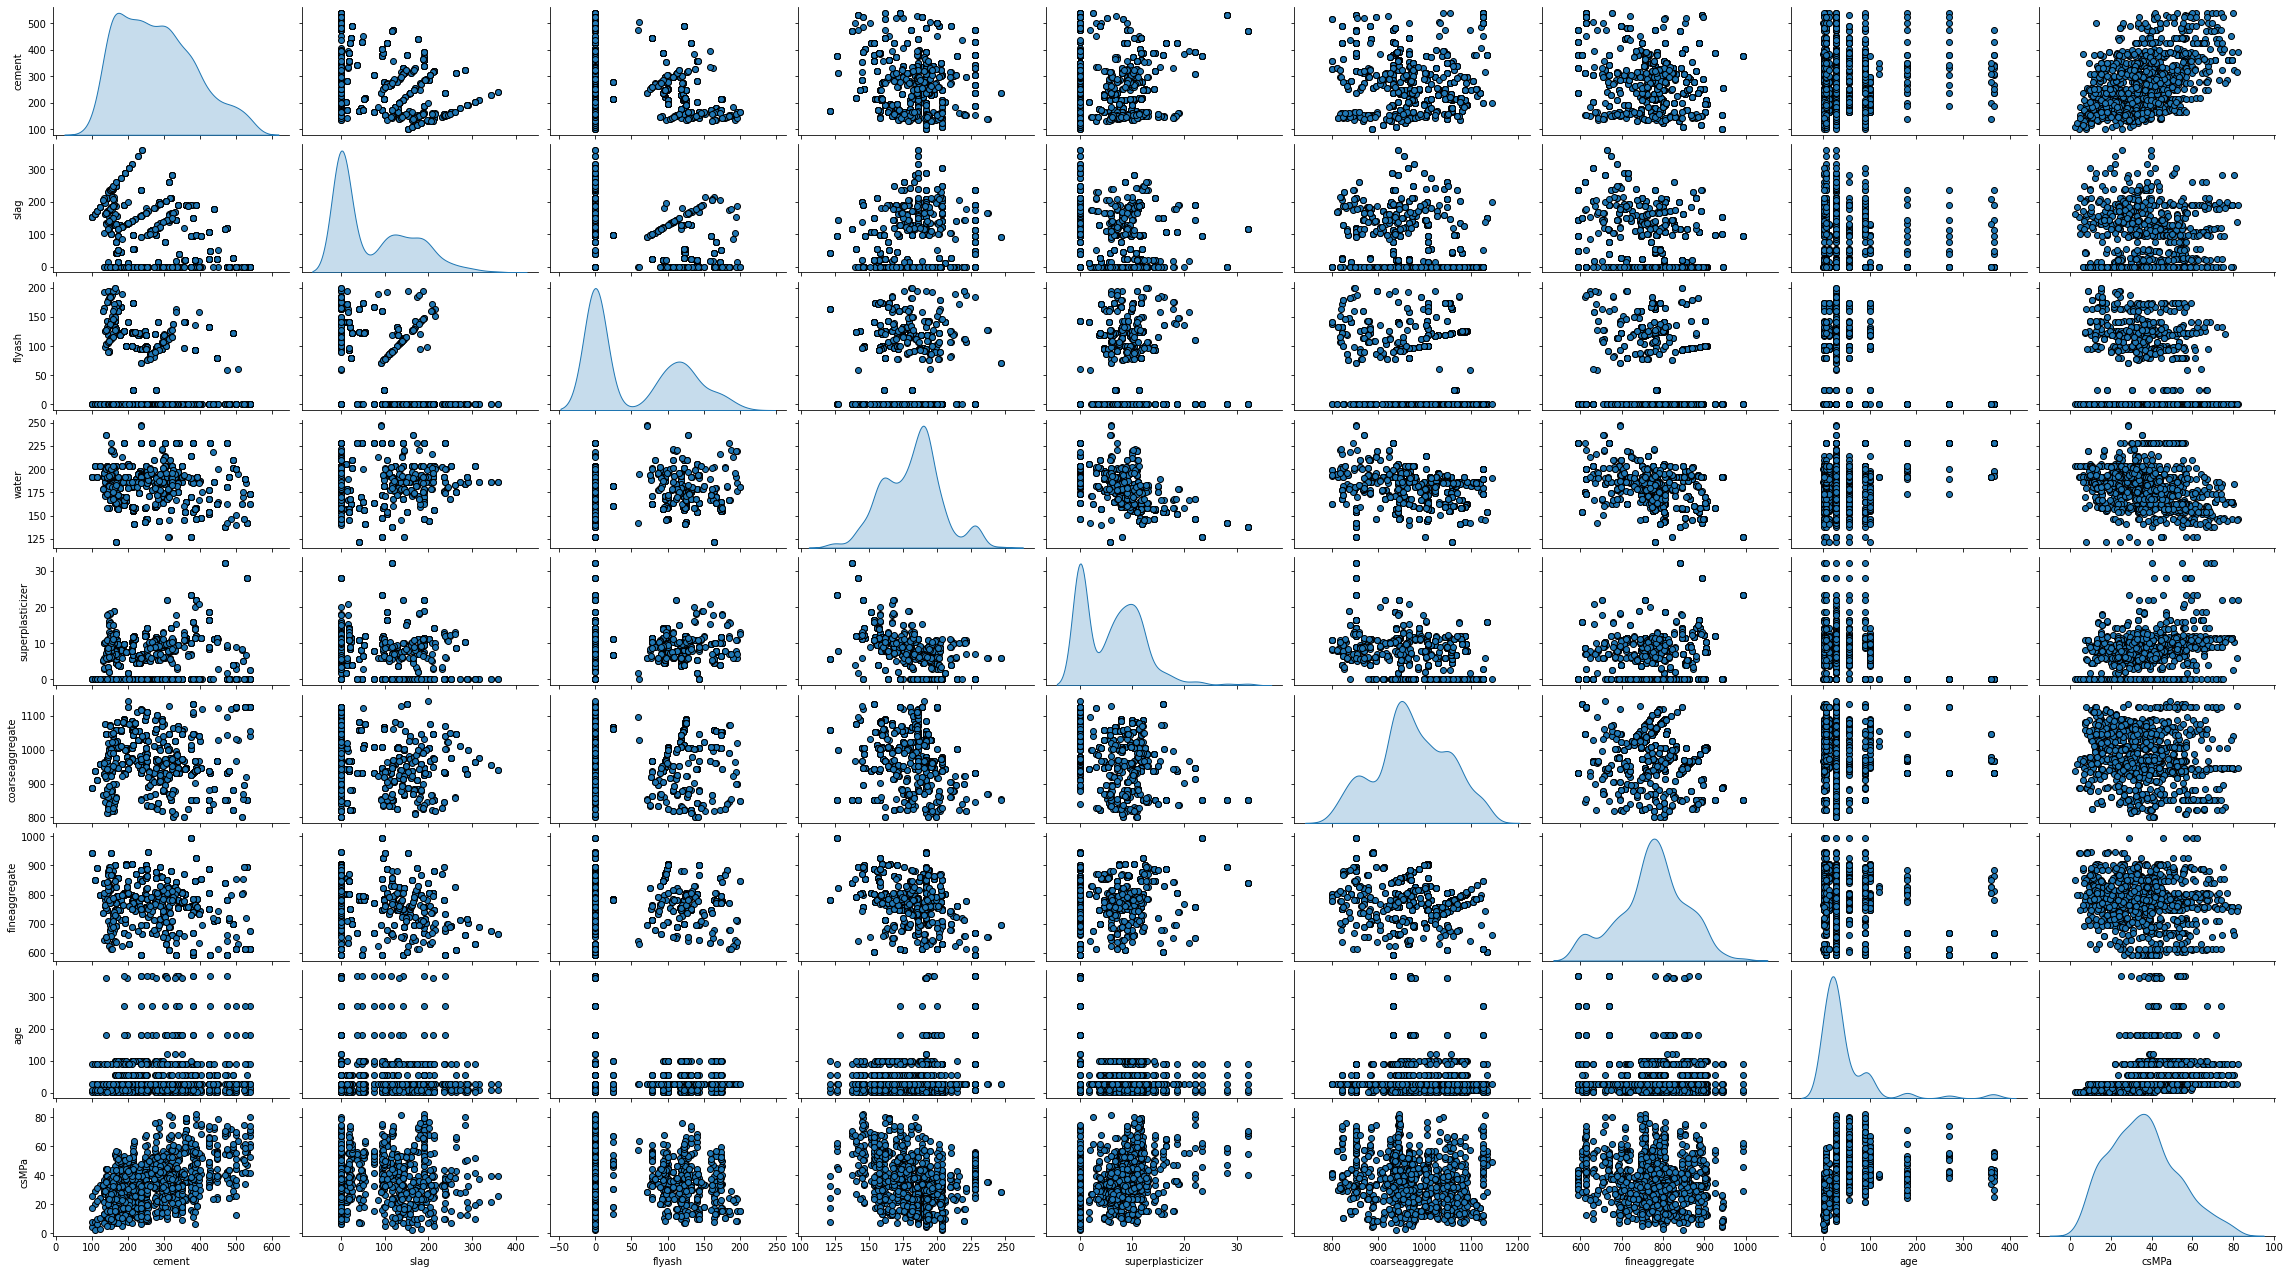

In [26]:
sns.pairplot(df,height=2.0,aspect=1.8,
             plot_kws={'edgecolor':'k', 'linewidth':1.0},
             diag_kind='kde',diag_kws={'shade':True})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

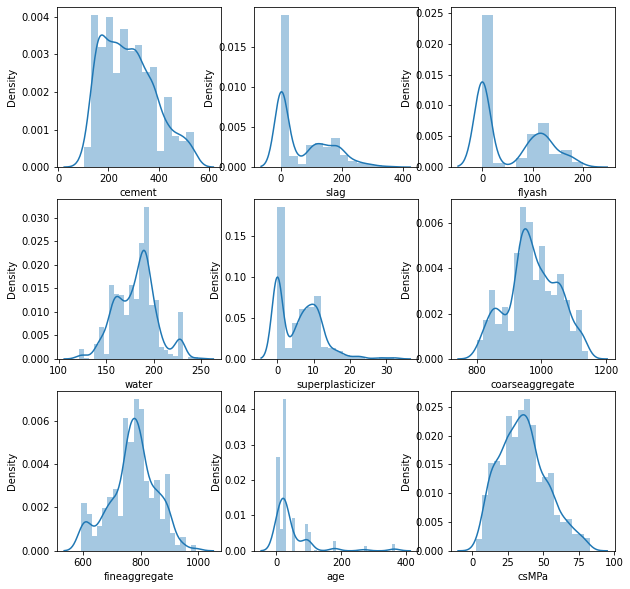

In [48]:
plt.figure(figsize=(10,10), facecolor='white')
plotnumber=1
for c in df.columns:
  plt.subplot(3,3,plotnumber)
  sns.distplot(df[c])
  plt.xlabel(c,fontsize=10)
  plotnumber=plotnumber+1
plt.show()


In [50]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

In [58]:
x = df.drop('csMPa', axis=1)
print(x)

      cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0      540.0    0.0     0.0  162.0               2.5           1040.0   
1      540.0    0.0     0.0  162.0               2.5           1055.0   
2      332.5  142.5     0.0  228.0               0.0            932.0   
3      332.5  142.5     0.0  228.0               0.0            932.0   
4      198.6  132.4     0.0  192.0               0.0            978.4   
...      ...    ...     ...    ...               ...              ...   
1025   276.4  116.0    90.3  179.6               8.9            870.1   
1026   322.2    0.0   115.6  196.0              10.4            817.9   
1027   148.5  139.4   108.6  192.7               6.1            892.4   
1028   159.1  186.7     0.0  175.6              11.3            989.6   
1029   260.9  100.5    78.3  200.6               8.6            864.5   

      fineaggregate  age  
0             676.0   28  
1             676.0   28  
2             594.0  270  
3             5

In [60]:
y= df['csMPa']
y


0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: csMPa, Length: 1030, dtype: float64

In [61]:
print(x.shape)
print(y.shape)

(1030, 8)
(1030,)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

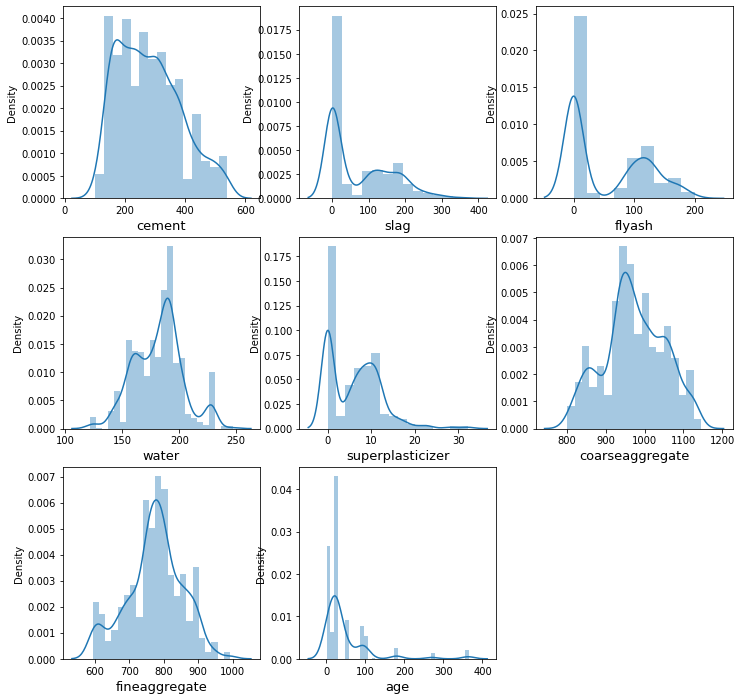

In [62]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber = 1
for column in x.columns:
    plt.subplot(3,3,plotnumber)
    sns.distplot(x[column])
    plt.xlabel(column, fontsize=13)
    plotnumber+=1
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

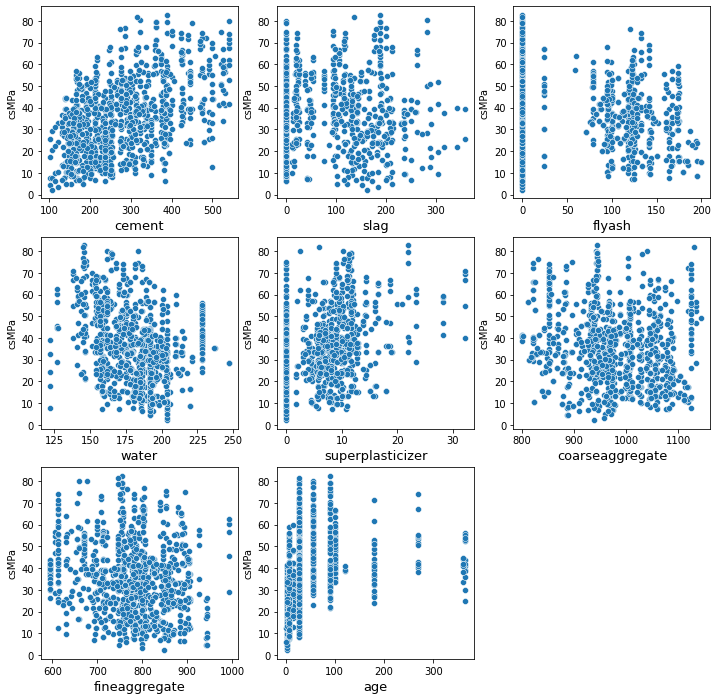

In [66]:
plt.figure(figsize=(12,12),facecolor='white')
plotnumber = 1
for column in x.columns:
    plt.subplot(3,3,plotnumber)
    sns.scatterplot(x[column],y)
    plt.xlabel(column, fontsize=13)
    plotnumber+=1
plt.show()

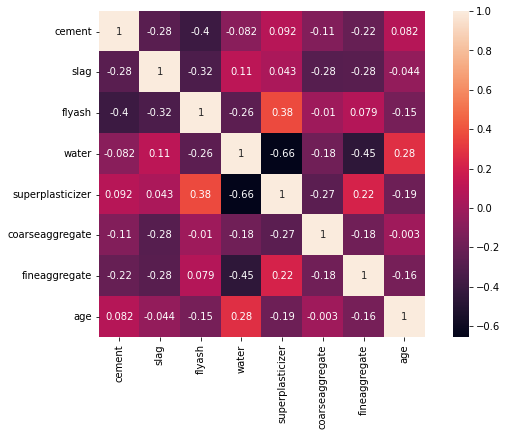

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(x.corr(), annot=True, square=True)

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
x_train

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
196,194.7,0.0,100.5,165.6,7.5,1006.4,905.9,28
631,325.0,0.0,0.0,184.0,0.0,1063.0,783.0,7
81,318.8,212.5,0.0,155.7,14.3,852.1,880.4,3
526,359.0,19.0,141.0,154.0,10.9,942.0,801.0,3
830,162.0,190.0,148.0,179.0,19.0,838.0,741.0,28
...,...,...,...,...,...,...,...,...
87,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,3
330,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
121,475.0,118.8,0.0,181.1,8.9,852.1,781.5,28


In [119]:
y_train

196    25.72
631    17.54
81     25.20
526    23.64
830    33.76
       ...  
87     24.40
330    42.22
466    33.56
121    68.30
860    38.46
Name: csMPa, Length: 721, dtype: float64

In [120]:
x_test.shape

(309, 8)

In [78]:
x_train.shape

(721, 8)

In [79]:
y_train.shape

(721,)

In [111]:
y_test.shape

(309,)

In [121]:
scalar = StandardScaler()
X_train = scalar.fit(x_train)
X_train = scalar.transform(x_train)
X_test = scalar.transform(x_test)
X_train= pd.DataFrame(X_train,columns=x_train.columns)
X_train

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,-0.828484,-0.855296,0.761701,-0.766488,0.227273,0.415545,1.676803,-0.292980
1,0.374823,-0.855296,-0.816913,0.103748,-1.013995,1.136979,0.141904,-0.633845
2,0.317566,1.568935,-0.816913,-1.234713,1.352690,-1.551191,1.358333,-0.698772
3,0.688809,-0.638541,1.397859,-1.315115,0.789982,-0.405309,0.366706,-0.698772
4,-1.130465,1.312252,1.507813,-0.132729,2.130551,-1.730912,-0.382635,-0.292980
...,...,...,...,...,...,...,...,...
716,0.017432,1.436600,-0.816913,-1.754963,0.839632,0.392602,0.400426,-0.698772
717,-0.347346,-0.855296,1.148108,-1.821176,0.972034,1.440338,0.365457,-0.520224
718,-0.869117,-0.855296,1.149679,-0.719192,0.624479,1.340918,0.340479,0.875699
719,1.760056,0.499992,-0.816913,-0.033409,0.458977,-1.551191,0.123170,-0.292980


In [127]:
X_test= pd.DataFrame(X_test,columns=x_test.columns)

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor

In [129]:
models = {
    "                     Linear Regression" : LinearRegression(),
    "                 L2 (Ridge) Regression" : Ridge(),
    "Support Vector Machine (Linear Kernel)" : LinearSVR(),
    "   Support Vector Machine (RBF Kernel)" : SVR(),
    "                         Decision Tree" : DecisionTreeRegressor(),
    "                        Neural Network" : MLPRegressor(),
    "                         Random Forest" : RandomForestRegressor(),
    "                     Gradient Boosting" : GradientBoostingRegressor(),
    "                              AdaBoost" : AdaBoostRegressor()
}

In [130]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('model trained with. {}'.format(name))

model trained with.                      Linear Regression
model trained with.                  L2 (Ridge) Regression
model trained with. Support Vector Machine (Linear Kernel)
model trained with.    Support Vector Machine (RBF Kernel)
model trained with.                          Decision Tree


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


model trained with.                         Neural Network
model trained with.                          Random Forest
model trained with.                      Gradient Boosting
model trained with.                               AdaBoost


In [131]:
from sklearn.metrics import r2_score

In [132]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    score = r2_score(y_test,y_pred)
    print(score)

-33.07512682696553
-33.072393670966136
-4.503803270232951
-0.0004041003938808352
-1.8400781838354225
-4.50365181086812
-1.9850088003139148
-2.909227897354628
-1.18420645565464


In [137]:
best_model = GradientBoostingRegressor()
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = r2_score(y_test,y_pred)
print ('score before hyperparameter tuning {}'.format(score))

score before hyperparameter tuning 0.8915242551563176


In [139]:
param = {'learning_rate': [0.01,0.1,1.0],
         'n_estimators': [100,150,200],
         'max_depth':    [3,4,5]
}

In [143]:
clf= GridSearchCV(estimator=best_model, param_grid=param)
clf.fit(x_train,y_train)
best_param = clf.best_params_
print(best_param)

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [148]:
y_pred = clf.predict(x_test)
score= r2_score(y_test,y_pred)
print("After parameter tuning :", score)

After parameter tuning : 0.9224059408086694
